# Titanic Dataset Data Visualization Assignment

### 1. Importing libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, facet_grid, labs, geom_col

### 2. Reading the dataset

In [2]:
df_titanic = pd.read_csv("NewTitanic.tsv", sep='\t')

### 3. Checking the dataset.

In [3]:
df_titanic.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Title,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,ship
0,0,1,0,Third,Mr,Owen Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,S,Titanic
1,1,2,1,First,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.0,1,0,PC 17599,71.2833,C,Titanic
2,2,3,1,Third,Miss,Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Titanic
3,3,4,1,First,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.0,1,0,113803,53.1000,S,Titanic
4,4,5,0,Third,Mr,William Henry,Allen,male,35.0,0,0,373450,8.0500,S,Titanic


#### I don't know why but we have an unnecessary index column. I will get rid of it.

In [4]:
df_titanic.drop('Unnamed: 0', axis=1, inplace=True)

### 4. Visualizing with matplotlib library.


#### Bar Chart for Survived column.

<BarContainer object of 2 artists>

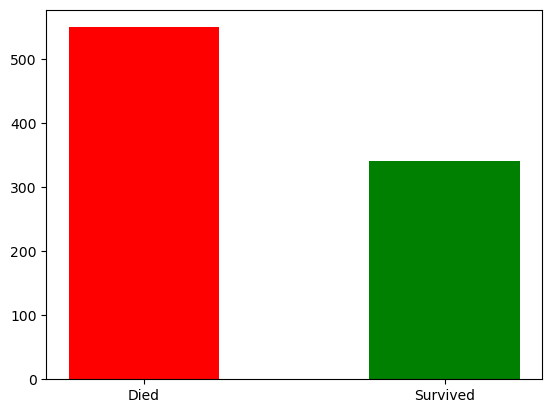

In [5]:
right = [0, 1]
tick_label = ['Died', 'Survived']
plt.bar(right, df_titanic['Survived'].value_counts(), tick_label=tick_label,
          width = 0.5, color = ['red', 'green'])

#### Histogram chart for Age column.

(array([ 53.,  34., 164., 179., 124.,  73.,  50.,  26.,  11.,   2.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

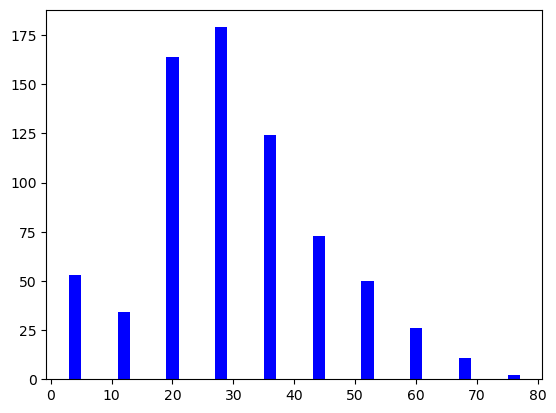

In [6]:
bins = 10
ages = []
for x in df_titanic['Age']:
    if x != 'NoInfo' and x != 'WrongValue':
        
        ages.append(int(float(x)))

plt.hist(ages, bins, color='blue', histtype='bar', rwidth=0.25)

#### Pie Chart for PClass

In [7]:
df_titanic['Pclass'].value_counts()

Third     490
First     215
Second    185
Name: Pclass, dtype: int64

In [8]:
slices = df_titanic['Pclass'].value_counts()
colors = ['r', 'y', 'g']
classes = ['Third', 'First', 'Second']

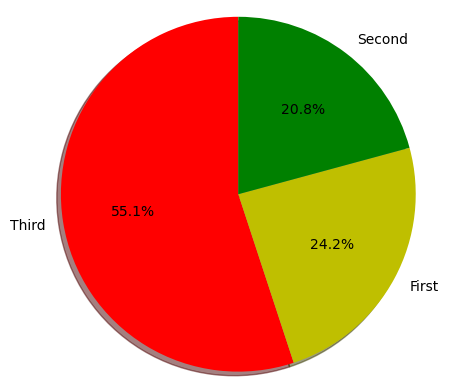

In [9]:
plt.pie(slices, labels = classes, colors=colors, 
        startangle=90, shadow = True,
        radius = 1.2, autopct = '%1.1f%%')
plt.show()

#### Stacked Bar Chart for Sex~Pclass

In [10]:
labels = ['First', 'Second', 'Third']
men_classes = []
women_classes = []
width = 0.35

In [11]:
count = -1
first = 0
second = 0
third = 0
for x in df_titanic['Sex']:
    count += 1
    if x == 'male':
        if df_titanic['Pclass'][count] == 'First':
            first += 1
        elif df_titanic['Pclass'][count] == 'Second':
            second += 1
        elif df_titanic['Pclass'][count] == 'Third':
            third += 1
            
men_classes.append(first)
men_classes.append(second)
men_classes.append(third)

In [12]:
men_classes

[122, 109, 346]

In [13]:
count = -1
first = 0
second = 0
third = 0
for x in df_titanic['Sex']:
    count += 1
    if x == 'female':
        if df_titanic['Pclass'][count] == 'First':
            first += 1
        elif df_titanic['Pclass'][count] == 'Second':
            second += 1
        elif df_titanic['Pclass'][count] == 'Third':
            third += 1
            
women_classes.append(first)
women_classes.append(second)
women_classes.append(third)

In [14]:
women_classes

[93, 76, 144]

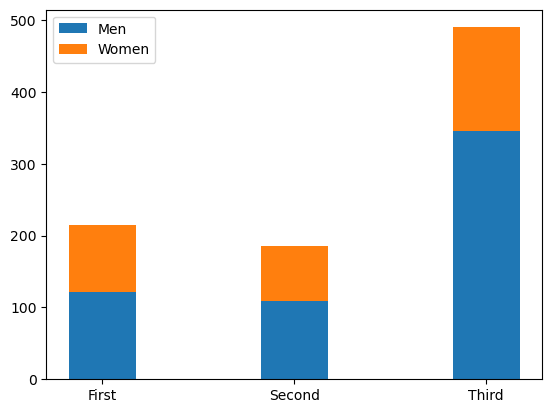

In [15]:
fig, ax = plt.subplots()

ax.bar(labels, men_classes, width, label='Men')
ax.bar(labels, women_classes, width, bottom=men_classes, 
       label='Women')

ax.legend()
plt.show()

#### Grouped Bar Chart for the same as above

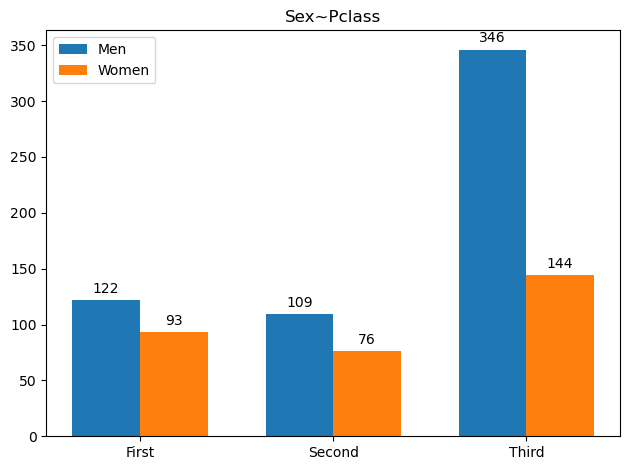

In [16]:
x = np.arange(len(labels))

fig1, ax1 = plt.subplots()
rects1 = ax1.bar(x - width/2, men_classes, width, label='Men')
rects2 = ax1.bar(x + width/2, women_classes, width, label='Women')

ax1.set_xticks(x, labels)
ax1.legend()

ax1.set_title('Sex~Pclass')
ax1.bar_label(rects1, padding=3)
ax1.bar_label(rects2, padding=3)

fig1.tight_layout()

plt.show()

### 5. Visualizing with Seaborn library with the Matplotlib library.

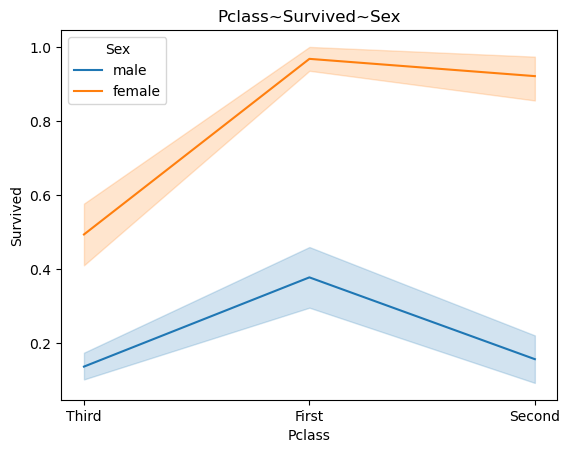

In [18]:
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_titanic)

plt.title("Pclass~Survived~Sex")
plt.show()

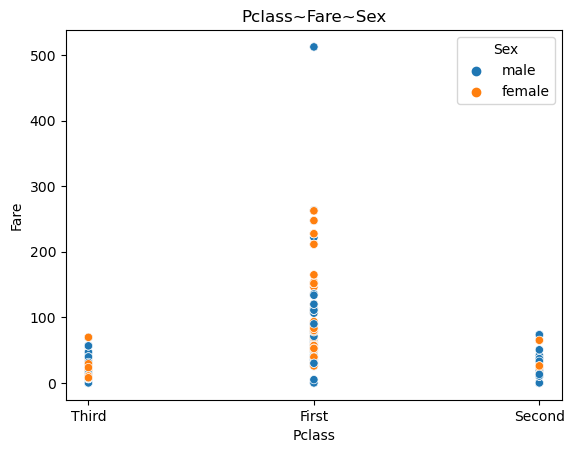

In [20]:
sns.scatterplot(x='Pclass', y='Fare', data=df_titanic, hue='Sex')

plt.title("Pclass~Fare~Sex")
plt.show()

### 6. Visualizing with Plotnine library.

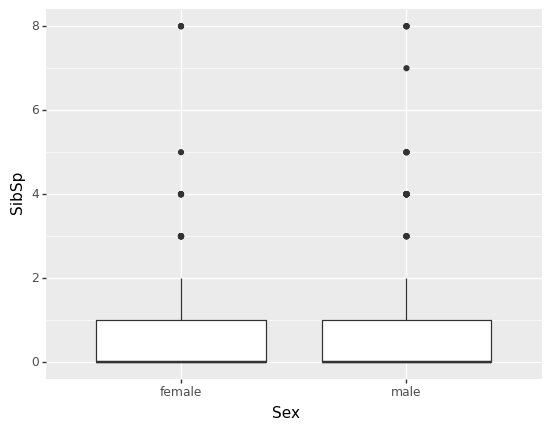

<ggplot: (132541256804)>

In [29]:
ggplot(df_titanic) + aes(x="Sex", y="SibSp") + geom_boxplot()

C:\Users\emir1\anaconda3\envs\python\lib\site-packages\plotnine\layer.py:391: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


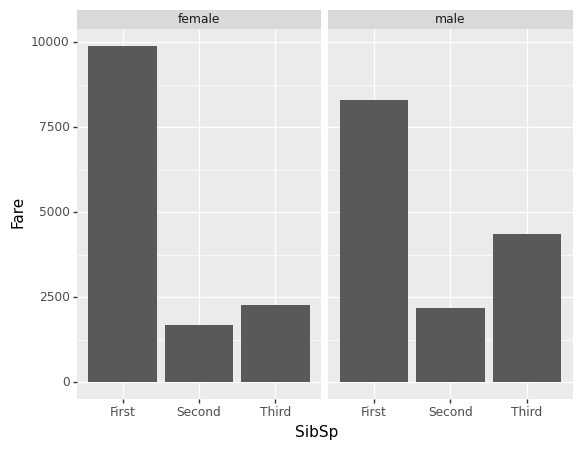

<ggplot: (132543006401)>

In [37]:
(
    ggplot(df_titanic)
    + facet_grid(facets="~Sex")
    + aes(x="Pclass", y="Fare")
    + labs(
        x="SibSp",
        y="Fare",
    )
    + geom_col()
)